# **Assignment -2 (Deep Learning)  cs23mtech14018 ( Yash Shukla )**

Note : Please run all the cells at once rather than running individually,due to their dependencies.

# **Q1)** **Convolution function**:

It accepts an image input, a filter kernel, stride, padding, and the non-
linear function. The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter
kernel, and the output activation map. Ensure that your function can accept multi-channel input
and a corresponding kernel volume. (5)

# **Setting Up the Input Image (IITH Logo)**

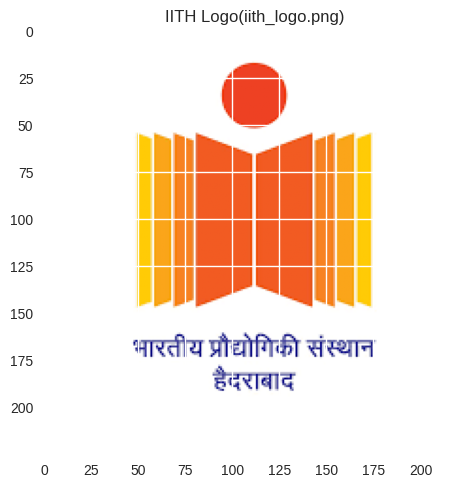

In [77]:
# Importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Setting Up the Path to the image file
image_path = "iith_logo.png"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV uses BGR format by default,So converting it into RGB)
image_rgb_without_normalized = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalizing the image pixel values to be in the range [0, 1]
image_rgb = image_rgb_without_normalized / 255.0

# Displaying the IITH Logo image using matplotlib
plt.imshow(image_rgb)
plt.title("IITH Logo(iith_logo.png)")
plt.show()


# **Activation Functions Used :**

In [78]:
# Activation functions
def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

def relu(x):
    """ReLU activation function."""
    return np.maximum(x, 0)

def tanh(x):
    """Hyperbolic tangent activation function."""
    return np.tanh(x)

def leaky_relu(x):
    """Leaky ReLU activation function."""
    alpha = np.random.randn(1, 1)
    return np.maximum(0, x) + alpha * np.minimum(0, x)


# **Convolution Function**

In [79]:
# Convolution function
def apply_convolution(img, kernel, activation="None", padding=0, stride=1):
    """Applying convolution on the image with the given kernel, activation function, padding, and stride."""

    # Get the dimensions of the input image and kernel
    img_height, img_width, img_channels = img.shape
    kernel_height, kernel_width, kernel_channels = kernel.shape

    # Calculate the output dimensions of the convolution operation
    conv_height = int((img_height - kernel_height + 2 * padding) / stride + 1)
    conv_width = int((img_width - kernel_width + 2 * padding) / stride + 1)

    # Calculate the dimensions of the padded image
    padded_height = int(img_height + 2 * padding)
    padded_width = int(img_width + 2 * padding)

    # Get the number of channels in the kernel in (int)
    kernel_size = int(kernel_channels)

    # Apply padding
    padded_img = np.pad(img, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)

    # Initialize the output image
    convoluted_img = np.zeros((conv_height, conv_width))

    # Convolution operation
    for y in range(0, conv_height):
        for x in range(0, conv_width):
            # Extract the region of interest from the padded image and perform element-wise multiplication with the kernel, then sum the result
            convoluted_img[y, x] = np.sum(padded_img[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel)

    # Apply activation function
    if activation == "sigmoid":
        convoluted_img = sigmoid(convoluted_img)
    elif activation == "relu":
        convoluted_img = relu(convoluted_img)
    elif activation == "tanh":
        convoluted_img = tanh(convoluted_img)
    elif activation == "leaky_relu":
        convoluted_img = leaky_relu(convoluted_img)

    return convoluted_img


# **Initializing the filter/Kernel**

In [80]:
# initializing the convolution function

filter = np.array([[[0.1, 0.2, 0.3], [0.2, 0.3, 0.4], [0.3, 0.4, 0.5]],
                           [[0.4, 0.5, 0.6], [0.5, 0.6, 0.7], [0.6, 0.7, 0.8]],
                           [[0.7, 0.8, 0.9], [0.8, 0.9, 1.0], [0.9, 1.0, 1.0]]])


# **Displaying the Results**

Image Shape before Convolution operation:  (225, 225, 3)


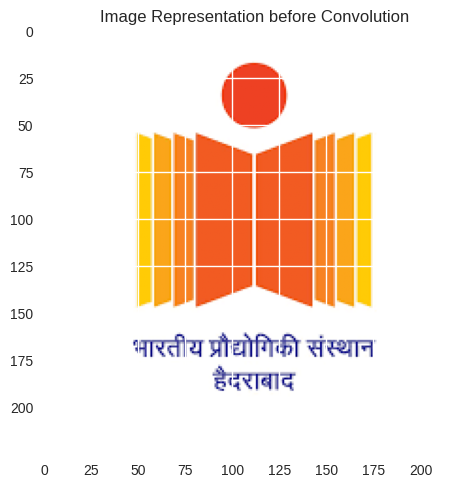

____________________________________________________________________________________________________ 

Kernel Used:  (3, 3, 3)


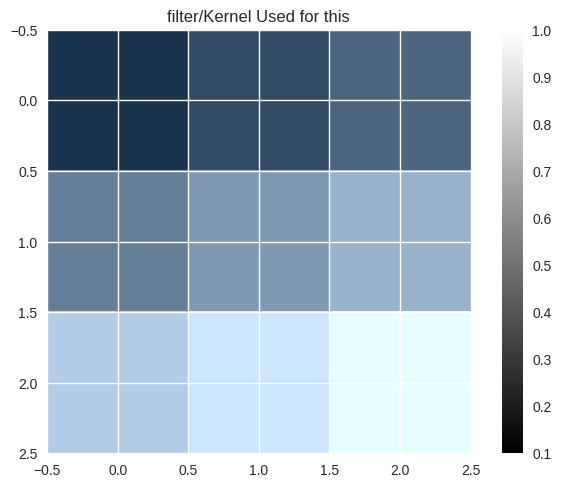

____________________________________________________________________________________________________ 

Image Shape after Convolution for sigmoid:  (223, 223)


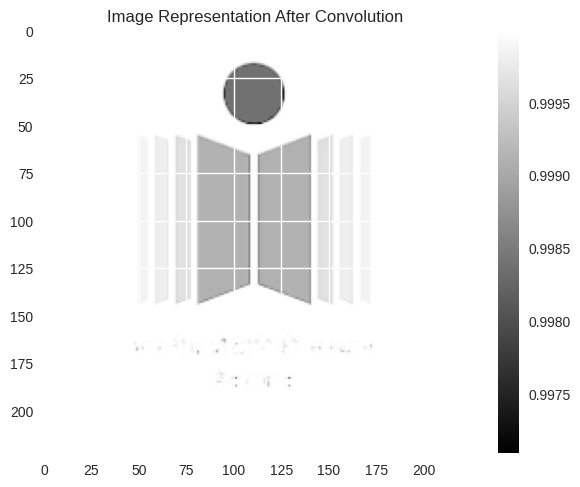

Image Shape after Convolution for relu:  (223, 223)


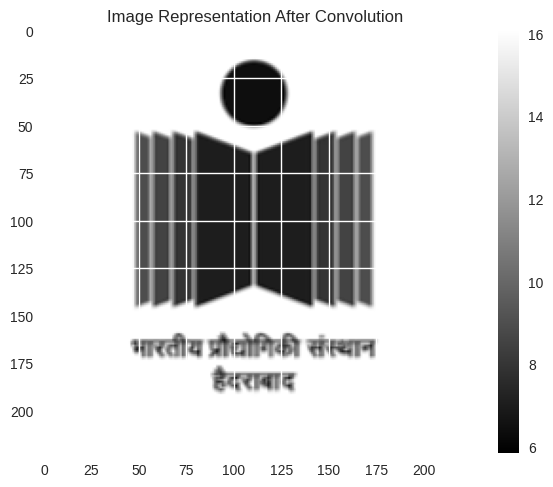

Image Shape after Convolution for tanh:  (223, 223)


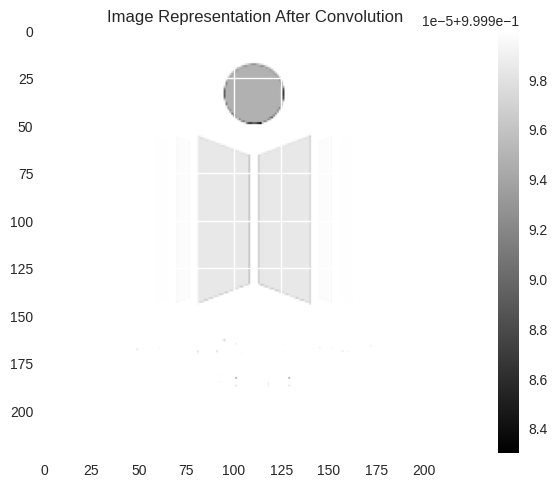

Image Shape after Convolution for leaky_relu  (223, 223)


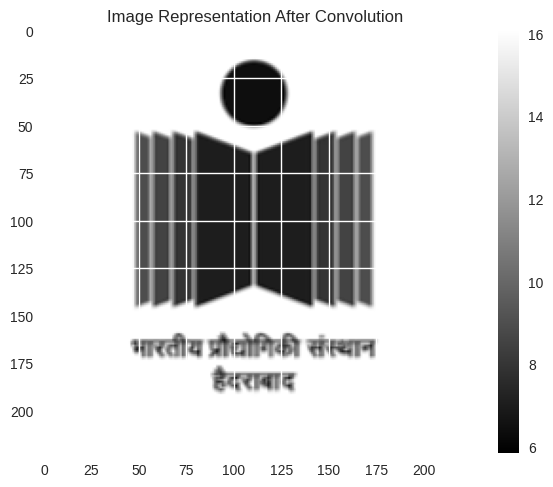

In [81]:
# Displaying the results :

print("Image Shape before Convolution operation: ", image_rgb.shape)
plt.imshow(image_rgb)
plt.title("Image Representation before Convolution")
plt.show()
print("_" * 100, '\n')

# Assuming filter/kernel grayscale image/ Showing filter
print("Kernel Used: ", filter.shape)
plt.imshow(filter, cmap='gray')
plt.title("filter/Kernel Used for this")
plt.colorbar()
plt.show()
print("_" * 100, '\n')

# Applying Sigmoid
convolved_img1 = apply_convolution(image_rgb, filter, activation="sigmoid", padding=0, stride=1)
print("Image Shape after Convolution for sigmoid: ", convolved_img1.shape)
plt.imshow(convolved_img1, cmap='gray')  # Assuming convolved_img is a grayscale image
plt.title("Image Representation After Convolution")
plt.colorbar()
plt.show()

# Applying relu
convolved_img2 = apply_convolution(image_rgb, filter, activation="relu", padding=0, stride=1)
print("Image Shape after Convolution for relu: ", convolved_img2.shape)
plt.imshow(convolved_img2, cmap='gray')  # Assuming convolved_img is a grayscale image
plt.title("Image Representation After Convolution")
plt.colorbar()
plt.show()

# Applying tanh
convolved_img3 = apply_convolution(image_rgb, filter, activation="tanh", padding=0, stride=1)
print("Image Shape after Convolution for tanh: ", convolved_img3.shape)
plt.imshow(convolved_img3, cmap='gray')  # Assuming convolved_img is a grayscale image
plt.title("Image Representation After Convolution")
plt.colorbar()
plt.show()

# Applying leaky_relu
convolved_img4 = apply_convolution(image_rgb, filter, activation="leaky_relu", padding=0, stride=1)
print("Image Shape after Convolution for leaky_relu ", convolved_img4.shape)
plt.imshow(convolved_img4, cmap='gray')  # Assuming convolved_img is a grayscale image
plt.title("Image Representation After Convolution")
plt.colorbar()
plt.show()



# **Q2.) Pooling function:**

It accepts as input the activation map output from the convolution function,
a pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)

# **Pooling Function**

Max-Pooled Output Shape for convolved_img1:  (111, 111)


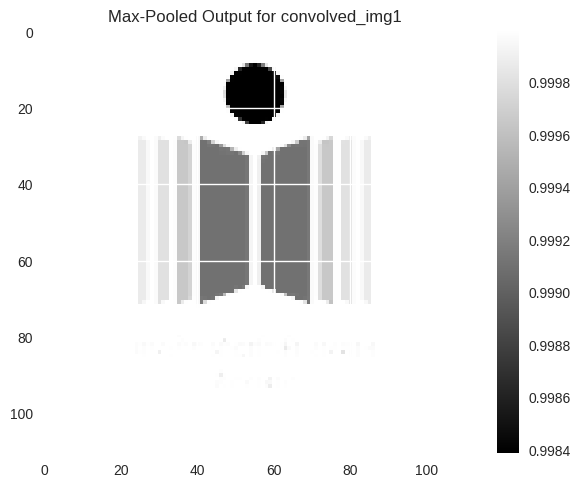

Average-Pooled Output Shape for convolved_img1:  (111, 111)


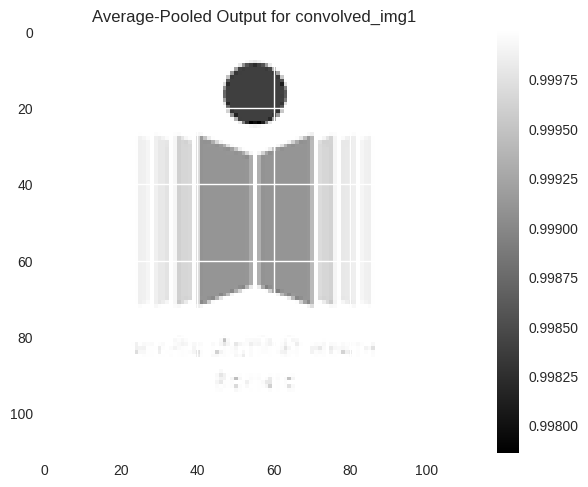

Max-Pooled Output Shape for convolved_img2:  (111, 111)


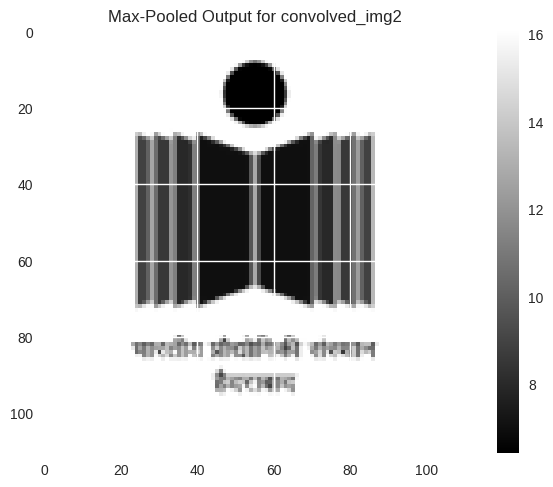

Average-Pooled Output Shape for convolved_img2:  (111, 111)


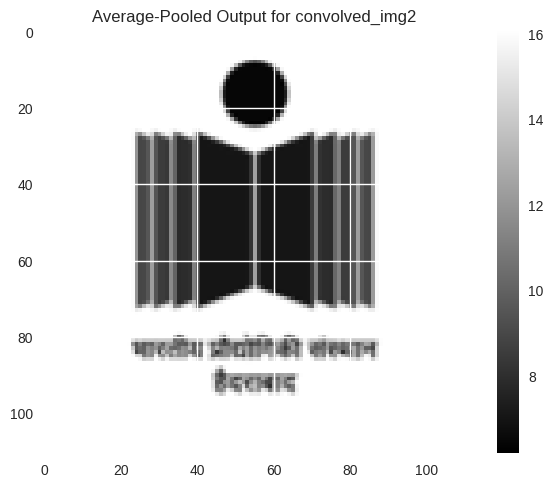

Max-Pooled Output Shape for convolved_img3:  (111, 111)


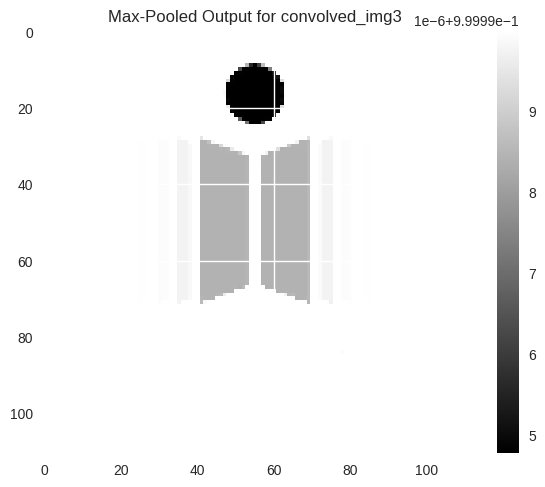

Average-Pooled Output Shape for convolved_img3:  (111, 111)


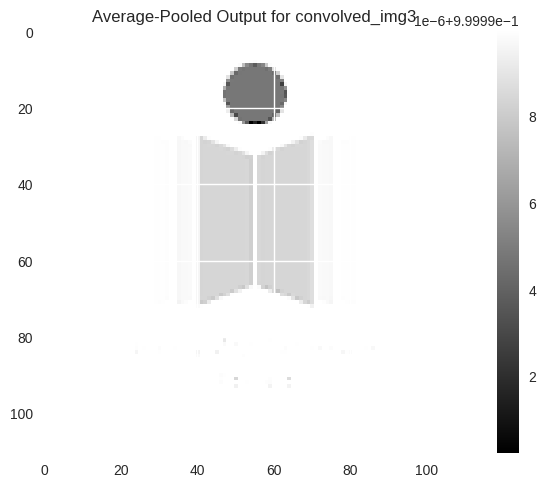

Max-Pooled Output Shape for convolved_img4:  (111, 111)


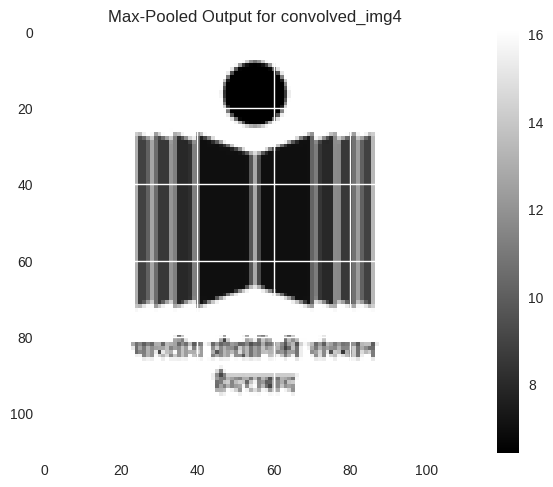

Average-Pooled Output Shape for convolved_img4:  (111, 111)


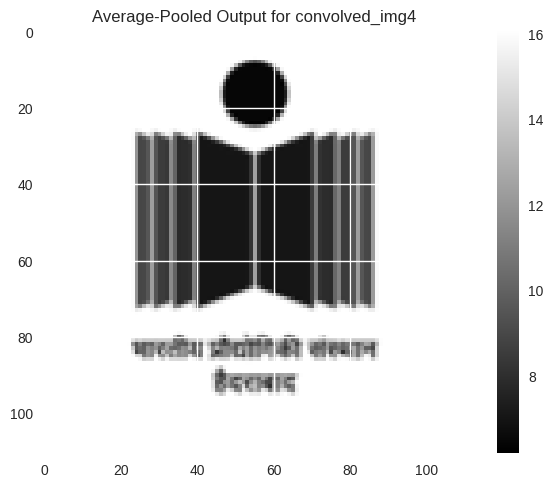

In [82]:
# Pooling function
def apply_pooling(activation_map, pooling_function=np.max, pool_size=(2, 2), stride=2):
    """Apply pooling on the activation map with the given pooling function, pool size, and stride."""

    # Get the dimensions of the activation map
    activation_height, activation_width = activation_map.shape

    # Get the pool size
    pool_height, pool_width = pool_size

     # Calculate the dimensions of the pooled output
    new_height = int((activation_height - pool_height) / stride + 1)
    new_width = int((activation_width - pool_width) / stride + 1)

    # Initialize the pooled output
    pooled_output = np.zeros((new_height, new_width))

    # Perform pooling operation
    for y in range(0, new_height):
        for x in range(0, new_width):

            # Extract the pool region from the activation map
            pool_region = activation_map[y * stride:y * stride + pool_height, x * stride:x * stride + pool_width]

            # Apply the pooling function to the pool region and store the result in the pooled output
            pooled_output[y, x] = pooling_function(pool_region)

    return pooled_output

# Displaying Results

# Applying max pooling to convolved_img1
pooled_output1 = apply_pooling(convolved_img1, pooling_function=np.max, pool_size=(2, 2), stride=2)
print("Max-Pooled Output Shape for convolved_img1: ", pooled_output1.shape)
plt.imshow(pooled_output1, cmap='gray')
plt.title("Max-Pooled Output for convolved_img1")
plt.colorbar()
plt.show()

# Applying average pooling to convolved_img1
avg_pooled_output1 = apply_pooling(convolved_img1, pooling_function=np.mean, pool_size=(2, 2), stride=2)
print("Average-Pooled Output Shape for convolved_img1: ", avg_pooled_output1.shape)
plt.imshow(avg_pooled_output1, cmap='gray')
plt.title("Average-Pooled Output for convolved_img1")
plt.colorbar()
plt.show()


# Applying max pooling to convolved_img2
pooled_output2 = apply_pooling(convolved_img2, pooling_function=np.max, pool_size=(2, 2), stride=2)
print("Max-Pooled Output Shape for convolved_img2: ", pooled_output2.shape)
plt.imshow(pooled_output2, cmap='gray')
plt.title("Max-Pooled Output for convolved_img2")
plt.colorbar()
plt.show()

# Applying average pooling to convolved_img2
avg_pooled_output2 = apply_pooling(convolved_img2, pooling_function=np.mean, pool_size=(2, 2), stride=2)
print("Average-Pooled Output Shape for convolved_img2: ", avg_pooled_output2.shape)
plt.imshow(avg_pooled_output2, cmap='gray')
plt.title("Average-Pooled Output for convolved_img2")
plt.colorbar()
plt.show()

# Applying max pooling to convolved_img3
pooled_output3 = apply_pooling(convolved_img3, pooling_function=np.max, pool_size=(2, 2), stride=2)
print("Max-Pooled Output Shape for convolved_img3: ", pooled_output3.shape)
plt.imshow(pooled_output3, cmap='gray')
plt.title("Max-Pooled Output for convolved_img3")
plt.colorbar()
plt.show()

# Applying average pooling to convolved_img2
avg_pooled_output3 = apply_pooling(convolved_img3, pooling_function=np.mean, pool_size=(2, 2), stride=2)
print("Average-Pooled Output Shape for convolved_img3: ", avg_pooled_output3.shape)
plt.imshow(avg_pooled_output3, cmap='gray')
plt.title("Average-Pooled Output for convolved_img3")
plt.colorbar()
plt.show()

# Applying max pooling to convolved_img4
pooled_output4 = apply_pooling(convolved_img4, pooling_function=np.max, pool_size=(2, 2), stride=2)
print("Max-Pooled Output Shape for convolved_img4: ", pooled_output4.shape)
plt.imshow(pooled_output4, cmap='gray')
plt.title("Max-Pooled Output for convolved_img4")
plt.colorbar()
plt.show()

# Applying average pooling to convolved_img2
avg_pooled_output4 = apply_pooling(convolved_img4, pooling_function=np.mean, pool_size=(2, 2), stride=2)
print("Average-Pooled Output Shape for convolved_img4: ", avg_pooled_output4.shape)
plt.imshow(avg_pooled_output4, cmap='gray')
plt.title("Average-Pooled Output for convolved_img4")
plt.colorbar()
plt.show()


# **Q3. Convolution layer function:**

It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function
must convolve the input volume (after padding if specified) with each kernel (at the specified stride
size) and generate an output activation volume after applying the specified non-linearity. Display
the input image or activation maps, the filter kernels, and the output activation maps. Verify that
the output of this function does indeed have the expected size (W × H × C) as discussed in class.
(3)

In [83]:
# checking

# def convolution_layer(input_volume, num_filters, kernel_volume, activation_func="Sigmoid", padding=0, stride=1):
#     """
#     Apply convolution for multiple kernels on the input_volume and merge the outputs as channels.
#     """
#     channels = []
#     # Applying Convolution for every kernel
#     for i in range(num_filters):
#         channels.append(apply_convolution(input_volume, kernel_volume[i], activation_func, padding, stride))
#     # Merging all output as channels
#     # Using cv2.merge()
#     return cv2.merge(channels)

# # # Example Kernels
# # blur_kernel = np.array([[[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
# #                     [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
# #                     [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]])

# # sharp_kernel = np.array([[[0,0,0],[-1,-1,-1],[0,0,0]],
# #                       [[-1,-1,-1],[5,5,5],[-1,-1,-1]],
# #                       [[0,0,0],[-1,-1,-1],[0,0,0]]])

# # new_kernel_volume1 = np.array([
# #     [
# #         [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]],
# #         [[0.125,0.125,0.125],[0.25,0.25,0.25],[0.125,0.125,0.125]],
# #         [[0.0625,0.0625,0.0625],[0.125,0.125,0.125],[0.0625,0.0625,0.0625]]
# #     ],
# #     [
# #         [[0,0,0],[-1,-1,-1],[0,0,0]],
# #         [[-1,-1,-1],[5,5,5],[-1,-1,-1]],
# #         [[0,0,0],[-1,-1,-1],[0,0,0]]
# #     ]
# # ])

# # Example usage
# print("Original Image Shape:", image_rgb.shape)

# # Random Kernel
# new_kernel_volume2 = np.random.rand(5, 5, 5, 3)
# conv_img = convolution_layer(image_rgb, new_kernel_volume2.shape[0], new_kernel_volume2, padding=1, stride=2)
# print("After 1st Convolution | Shape:", conv_img.shape)

# # Random Kernel
# new_kernel_volume3 = np.random.rand(10, 3, 3, 5)
# conv_img = convolution_layer(conv_img, new_kernel_volume3.shape[0], new_kernel_volume3, padding=0, stride=2)
# print("After 2nd Convolution | Shape:", conv_img.shape)

# # Random Kernel
# new_kernel_volume4 = np.random.rand(20, 3, 3, 10)
# conv_img = convolution_layer(conv_img, new_kernel_volume4.shape[0], new_kernel_volume4, padding=0, stride=2)
# print("After 3rd Convolution | Shape:", conv_img.shape)


# **Convolution Layer**

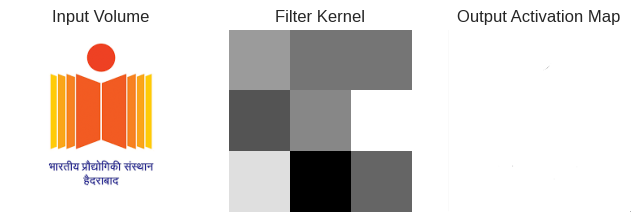

Expected output shape: (225, 225, 5)
Actual output shape: (225, 225)


[array([[0.69881744, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03268691, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03268691, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.03268691, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.03268691, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.39361894]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.05282323],
        [0.        , 0.        , 0.        , ..., 0.        , 0.

In [84]:

def convolution_layer(volume, num_filters, kernel_dims, stride, padding, activation="None"):
    """Convolution layer function."""

    # Get the dimensions of the input volume
    volume_height, volume_width, volume_channels = volume.shape

    # Initialize a list to store the output activation maps
    output_activation_maps = []
    # Initialize filters
    filters = [np.random.randn(kernel_dims[0], kernel_dims[1], volume_channels) for _ in range(num_filters)]

    # Convolve the volume with each filter
    for i, filter in enumerate(filters):

        # Apply convolution to get the output activation map
        output_activation_map = apply_convolution(volume, filter, activation, padding, stride)
        output_activation_maps.append(output_activation_map)

        # Display the input volume, filter kernel, and output activation map for the first filter
        if i == 0:
            plt.figure(figsize=(8, 4))
            plt.subplot(1, 3, 1)
            plt.imshow(volume)
            plt.title("Input Volume")
            plt.axis("off")

            plt.subplot(1, 3, 2)
            plt.imshow(filter[:,:,0])
            plt.title("Filter Kernel")
            plt.axis("off")

            plt.subplot(1, 3, 3)
            plt.imshow(output_activation_map)
            plt.title("Output Activation Map")
            plt.axis("off")
            plt.show()

    # Verify output size
    expected_output_height = int((volume_height - kernel_dims[0] + 2 * padding) / stride + 1)
    expected_output_width = int((volume_width - kernel_dims[1] + 2 * padding) / stride + 1)
    expected_output_channels = num_filters
    expected_output_shape = (expected_output_height, expected_output_width, expected_output_channels)
    print(f"Expected output shape: {expected_output_shape}")
    print(f"Actual output shape: {output_activation_map.shape}")

    return output_activation_maps

# Example usage
image = np.random.rand(32, 32, 3)  # Example input image
num_filters = 5
kernel_dims = (3, 3)
stride = 1
padding = 1
activation = "relu"
convolution_layer(image_rgb, num_filters, kernel_dims, stride, padding, activation)


# **Q4) Pooling layer function:**

 It accepts as input the activation map volume, the pooling function,
stride, and generates a pooled output volume. A special case for performing Global Average Pooling
should also be provided. (2)

Image Shape[Before Pooling]:  (225, 225, 3)


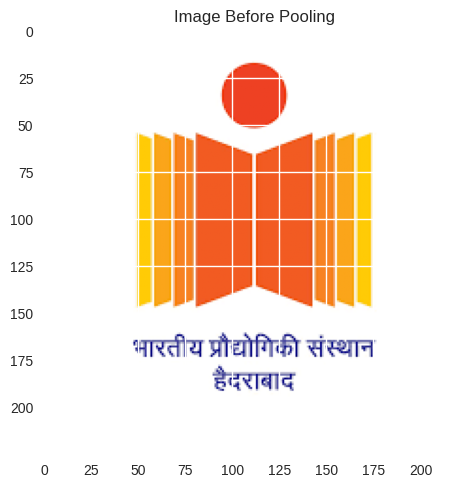


Applied Avg Pooling [Kernel 2x2] [Stride 2]
Image Shape[AFTER  Pooling]:  (112, 112, 3)


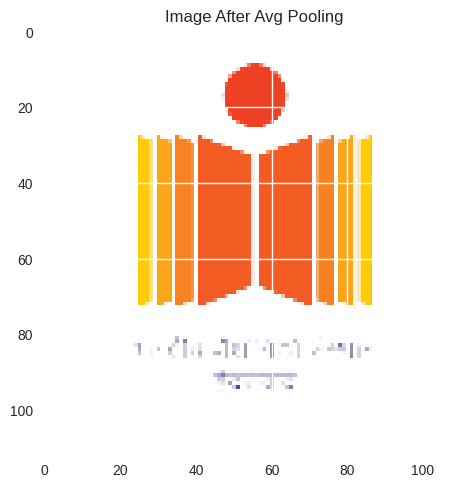

Test On IMAGE VOLUME [Kernel 3x3] [Stride 3]
Image Shape[Before Pooling]: (75, 75, 5)
Image Shape[AFTER  Pooling]: (25, 25, 5)


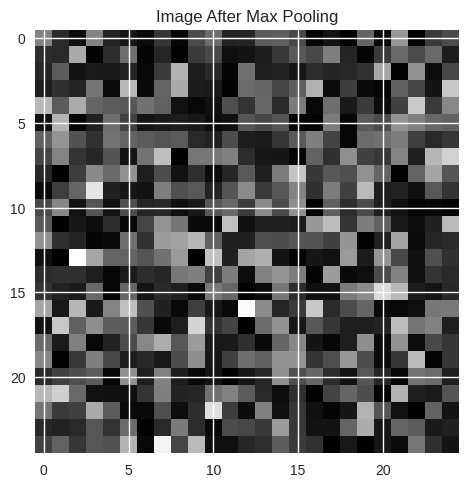

Test for GAP:
Image Shape[Before GAP]:  (225, 225, 3)
GAP Output: [0.9794128685548293, 0.8770240232389253, 0.8058374630839991]


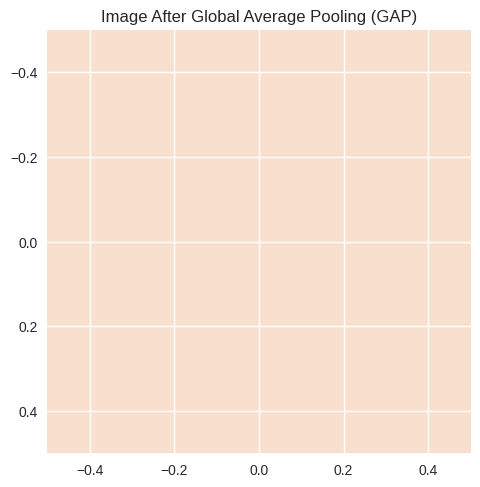

In [85]:
def Pooling_layer(img_vol, pool='Max', sti=2):
    """
    This is the pooling layer function.
    """

    # Global Average Pooling
    if pool == 'GAP':

        channels = []
         # Calculate the average over the entire image
        size = img_vol.shape[0] * img_vol.shape[1]
        for c in range(img_vol.shape[2]):
            #  Taking Avg over whole 2d image/matrix
            channels.append(np.mean(img_vol[:, :, c]))

        return channels

    # Pooling for multi-channel images
    if len(img_vol.shape) > 2:

        channels = []
        # Iterate through all channels
        for c in range(img_vol.shape[2]):
            # Apply pooling function to each channel
            channels.append(apply_pooling(img_vol[:, :, c], pooling_function=np.max, pool_size=(2, 2), stride=sti))
        # Stack channels back together
        return np.dstack(channels)

    else:

        # Pooling for single-channel images
        return apply_pooling(img_vol, pooling_function=np.max, pool_size=(2, 2), stride=sti)


# Testing pooling Layer
print("Image Shape[Before Pooling]: ", image_rgb.shape)
plt.imshow(image_rgb)
plt.title("Image Before Pooling")
plt.show()

# Apply Average Pooling
pool_img = Pooling_layer(image_rgb, pool='Avg', sti=2)
print("\nApplied Avg Pooling [Kernel 2x2] [Stride 2]")
print("Image Shape[AFTER  Pooling]: ", pool_img.shape)
plt.imshow(pool_img)
plt.title("Image After Avg Pooling")
plt.show()

# Test pooling on a random image volume
Test_Img = np.random.rand(75, 75, 5)
pool_img = Pooling_layer(Test_Img, pool='Max', sti=3)
print("Test On IMAGE VOLUME [Kernel 3x3] [Stride 3]")
print("Image Shape[Before Pooling]:", Test_Img.shape)
print("Image Shape[AFTER  Pooling]:", pool_img.shape)
plt.imshow(pool_img[:, :, 0])  # Displaying the first channel
plt.title("Image After Max Pooling")
plt.show()

# Apply Global Average Pooling
gap_pool = Pooling_layer(image_rgb, pool='GAP', sti=2)
print("Test for GAP:")
print("Image Shape[Before GAP]: ", image_rgb.shape)
print("GAP Output:", gap_pool)
plt.imshow(np.array(gap_pool).reshape(1, 1, -1))
plt.title("Image After Global Average Pooling (GAP)")
plt.show()

# **Q5.) Multilayer Perceptron (MLP) function:**

It accepts as input a vector, the number of hidden
layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This
function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (3)

MLP Function

In [86]:
import numpy as np

# Define the sigmoid and relu activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the softmax function
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

# # Define your MLP function
# def MLP(inp, NoHidL, HidSize, Activation, OutLSize):
#     # Ensure input is a 2D array
#     # inp = np.array(inp).reshape(1, -1)

#     inpSize = len(inp)
#     W = []
#     B = []
#     Lastw = inpSize

#     # Randomly Init Weights and Bias
#     for i in range(NoHidL):
#         w = np.random.rand(Lastw, HidSize[i])
#         W.append(w)

#         b = np.random.rand(HidSize[i])
#         B.append(b)

#         Lastw = HidSize[i]

#     w = np.random.rand(Lastw, OutLSize)
#     W.append(w)

#     b = np.random.rand(OutLSize)
#     B.append(b)

#     z1 = inp  # Initialize z1 with inp
#     # Forward pass with given non-linearity
#     for i in range(len(W) - 1):
#         if Activation == "sigmoid":
#             z1 = sigmoid(np.dot(z1, W[i]) + B[i])  # output Hidden layers
#         elif Activation == "Relu":
#             z1 = relu(np.dot(z1, W[i]) + B[i])  # output Hidden layers

#     z1 = np.dot(z1, W[-1]) + B[-1]  # Output of the Output layer

#     # Normalize output before returning to avoid overflow error in softmax due to exp
#     z1 = ((z1 - z1.min()) * (1 / (z1.max() - z1.min()) * 1))

#     return z1

def MLP(input_vector, num_hidden_layers, hidden_layer_sizes, activation_function, output_layer_size):
    # Ensure input is a 2D array
    # input_vector = np.array(input_vector).reshape(1, -1)

    input_size = len(input_vector)
    weights = []
    biases = []
    last_layer_size = input_size

    # Randomly initialize weights and biases for hidden layers
    for i in range(num_hidden_layers):
        weight = np.random.rand(last_layer_size, hidden_layer_sizes[i])
        weights.append(weight)

        bias = np.random.rand(hidden_layer_sizes[i])
        biases.append(bias)

        last_layer_size = hidden_layer_sizes[i]

    # Randomly initialize weights and biases for output layer
    weight = np.random.rand(last_layer_size, output_layer_size)
    weights.append(weight)

    bias = np.random.rand(output_layer_size)
    biases.append(bias)

    z = input_vector  # Initialize z with input_vector

    # Forward pass with the given activation function
    for i in range(len(weights) - 1):
        if activation_function == "sigmoid":
            z = sigmoid(np.dot(z, weights[i]) + biases[i])  # Output of hidden layers
        elif activation_function == "relu":
            z = relu(np.dot(z, weights[i]) + biases[i])  # Output of hidden layers

    z = np.dot(z, weights[-1]) + biases[-1]  # Output of the output layer

    # Normalize output before returning to avoid overflow error in softmax due to exp
    z = ((z - z.min()) * (1 / (z.max() - z.min()) * 1))

    return z

# Example usage
input_vector = np.random.randn(10)  # Input vector of size 10
num_hidden_layers = 2  # Number of hidden layers
hidden_layer_sizes = [20, 30]  # Size of each hidden layer
activation_function = "sigmoid"  # Activation function
output_layer_size = 5  # Size of the output layer

output = MLP(input_vector, num_hidden_layers, hidden_layer_sizes, activation_function, output_layer_size)

print("Normalized MLP Output for the Example Usage: ")
print(output)
print("_" * 100, '\n')
print("Softmax MLP Output for the Example Usage: ")
print(softmax(output))



Normalized MLP Output for the Example Usage: 
[0.36637705 0.16007669 0.         1.         0.62848636]
____________________________________________________________________________________________________ 

Softmax MLP Output for the Example Usage: 
[0.17571839 0.14296249 0.12181526 0.3311282  0.22837567]


# **Q6.) Putting-it all together**

Finally, use the functions you have written to implement a CNN with the
following architecture. The CNN must accept an image input and output a vector of appropriate
dimension. In other words, the function must effectively implement the feed-forward path in a
CNN. (5)
• Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC
dataset.
• Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• A Global Average Pooling (GAP) layer.
• An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the
o/p layer).
Verify that your composition of function accepts and image input and outputs a vector.

new Convolution Layer Function

In [87]:

def convolution_layer(volume, num_filters, kernel_dims, stride, padding, activation="None"):
    """Convolution layer function."""
    volume_height, volume_width, volume_channels = volume.shape
    output_activation_maps = []
    # Initialize filters
    filters = [np.random.randn(kernel_dims[0], kernel_dims[1], volume_channels) for _ in range(num_filters)]

    # Convolve the volume with each filter
    for i, filter in enumerate(filters):
        output_activation_map = apply_convolution(volume, filter, activation, padding, stride)
        output_activation_maps.append(output_activation_map)
        # Display the input, kernel, and output for the first filter
        # if i == 0:
        #     # plt.figure(figsize=(8, 4))
        #     # plt.subplot(1, 3, 1)
        #     # plt.imshow(volume)
        #     # plt.title("Input Volume")
        #     # plt.axis("off")

        #     # plt.subplot(1, 3, 2)
        #     # plt.imshow(filter[:,:,0])
        #     # plt.title("Filter Kernel")
        #     # plt.axis("off")

        #     # plt.subplot(1, 3, 3)
        #     # plt.imshow(output_activation_map)
        #     # plt.title("Output Activation Map")
        #     # plt.axis("off")
        #     # plt.show()

    # Verify output size
    expected_output_height = int((volume_height - kernel_dims[0] + 2 * padding) / stride + 1)
    expected_output_width = int((volume_width - kernel_dims[1] + 2 * padding) / stride + 1)
    expected_output_channels = num_filters
    expected_output_shape = (expected_output_height, expected_output_width, expected_output_channels)
    print(f"Expected output shape: {expected_output_shape}")
    print(f"Actual output shape: {output_activation_map.shape}")

    return np.stack(output_activation_maps,axis=2)

# # Example usage
# image = np.random.rand(32, 32, 3)  # Example input image
# num_filters = 5
# kernel_dims = (3, 3)
# stride = 1
# padding = 1
# activation = "relu"
# convolution_layer(image_rgb, num_filters, kernel_dims, stride, padding, activation)

def CNN(image):
    print("image=====",image.shape)
    # Convolution layer with 16 kernels of size 5x5 and ReLU activation
    conv1 = convolution_layer(image, 16, (5, 5), 1, 0, activation="relu")
    print(conv1.shape)

    # Max pooling layer of size 2x2 with stride 2
    pool1 =  Pooling_layer(conv1, pool='max', sti=2)
    print("pool1=====",pool1.shape)

    # Convolution layer with 32 kernels of size 3x3 and sigmoid activation
    conv2 = convolution_layer(pool1, 32, (3, 3), 1, 0, activation="sigmoid")

    # Max pooling layer of size 2x2 with stride 2
    pool2 = Pooling_layer(conv2,  pool='max', sti=2)

    # Global Average Pooling (GAP) layer
    # gap = Pooling_layer(pool2, pooling_function=np.mean, pool_size=pool2.shape[:2])
    gap = Pooling_layer(pool2, pool='GAP', sti=2)
    print("gap======",gap)

    # Flatten the output of the GAP layer
    # flattened = gap.flatten()

    flattened = np.array(gap).flatten()
    print("flattened======",len(flattened))

    # MLP with one hidden layer mapping to 1000 output nodes
    mlp_output = MLP(flattened, 1, [len(flattened)], "relu", 1000)

    print("mlp_output====",len(mlp_output))

    return mlp_output

# # Example usage
# input_image = np.random.rand(224, 224, 3)  # Example input image
# output_vector = CNN(input_image)
# print("Output Vector Shape:", output_vector.shape)
# print("Output Vector Shape:", output_vector)

import cv2
import numpy as np

# Load the image
image_path = 'beer.jpeg'
image = cv2.imread(image_path)

# Resize the image to 224x224 (assuming your model expects this size)
image_resized = cv2.resize(image, (224, 224))

# Convert the image to a numpy array
input_image = np.array(image_resized)

print("224*224 Beer image is an input")
output_vector = CNN(input_image)
print("Output Vector Shape:", output_vector.shape)
print("Output Vector Shape:", output_vector)




224*224 Beer image is an input
image===== (224, 224, 3)
Expected output shape: (220, 220, 16)
Actual output shape: (220, 220)
(220, 220, 16)
pool1===== (110, 110, 16)
Expected output shape: (108, 108, 32)
Actual output shape: (108, 108)
gap====== [0.37819753678934814, 0.0, 0.6562139038115066, 0.9440608415452696, 1.0, 1.0, 0.0030864197530864504, 1.0, 0.0, 0.0, 0.0017146776406035665, 0.5065680587142697, 0.0006858710562414266, 1.0, 0.6344889418904738, 1.0, 0.6954027379307626, 1.0, 0.00102880658436214, 1.6413273090215105e-61, 1.0, 1.0, 0.0003429355281207133, 0.0, 0.9825417844659092, 0.0024005486968449933, 0.0, 1.0, 1.0, 0.231177528987864, 1.0, 1.0]
flattened====== 32
mlp_output==== 1000
Output Vector Shape: (1000,)
Output Vector Shape: [0.33653136 0.45070578 0.75394479 0.5260269  0.40090142 0.62870355
 0.35145409 0.38088276 0.5759935  0.24887773 0.54128038 0.71167717
 0.3964216  0.28247063 0.46047078 0.40055733 0.22431438 0.62779112
 0.44844666 0.28402972 0.55360397 0.63165301 0.71881259 0

# **Q7.) The adding problem:**

 In this task, each data sample consists of a sequence of variable length,but a constant depth (size of feature vector at each time instance) of 2. All values of the first di-mension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that are marked by 1. The objective of the task is to sum the random values whose second dimensions
are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the class and compare their performance against a baseline that always predicts a sum of 1 plotting the learning curves and final performance. Note that you are expected to implement these models
(as opposed to using the built-in constructs).[3 (Elmon) + 7 (LSTM) + 4 (GRU)+ 6 (Dataset &
baseline & comparison) = 20]
The following table presents two data samples (x) along with their labels (y). Note that the
samples should be of different lengths (n), so the dimensions of each sample can be represented as
n × 2. Given examples have lengths of 5 and 8 respectively. You have to generate/create a big
dataset (≥ 5000) of such samples for training and testing of the RNNs.


# **Generating DataSet**

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [89]:
import numpy as np
import torch

# Set random seeds for reproducibility
np.random.seed(8999)
torch.manual_seed(8999)

# Initialize empty lists for input and output data
X, Y = [], []

# Define the maximum length of sequences
max_len = 9

# Define the lower and upper limits for sequence length
LOW_LIM, UPR_LIM = 2, 6

# Generate 5000 sequences
for _ in range(5000):

    # Generate a random length for the sequence
    LEN = np.random.randint(LOW_LIM, UPR_LIM)

    # Generate random data for the sequence
    D1 = np.random.random((LEN)).astype(np.double)
    D2 = np.zeros(LEN)

    # Randomly select two indices for setting D2 values to 1
    ONEs = np.random.randint(LEN, size=(2))
    while ONEs[0] == ONEs[1]:
        ONEs = np.random.randint(LEN, size=(2))
    D2[ONEs] = 1

    # Pad sequences to max_len
    padded_seq = np.zeros((max_len, 2))
    padded_seq[:LEN, 0] = D1
    padded_seq[:LEN, 1] = D2

    # Append the padded sequence to the input data array after converting to a tensor
    X.append(torch.from_numpy(padded_seq).double())

    # Append the sum of the selected elements from D1 to the output data array after converting to a tensor
    Y.append(torch.from_numpy(np.array([D1[ONEs[0]] + D1[ONEs[1]]])).double())

# Convert the lists to tensors
X = torch.stack(X)
Y = torch.stack(Y)

# Print the shapes of the input and output tensors
X.shape, Y.shape


(torch.Size([5000, 9, 2]), torch.Size([5000, 1]))

In [90]:
# Split the data into training and testing sets with a ratio of 33% testing and 66% training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [91]:
# Selecting the device for computation based on availability
# If CUDA (GPU) is available, use it; otherwise, use CPU
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cpu'

# **Implementation of Elman Recurrent Neural Network**

In [92]:
# Implementation of an Elman Recurrent Neural Network (Elman RNN)
# The Elman RNN follows the equations and structure described above.

class ElmonRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()

    # Define the linear layers
    self.U = nn.Linear(input_size, hidden_size  , bias=False )
    self.W = nn.Linear(hidden_size, hidden_size)
    self.V = nn.Linear(hidden_size, output_size)

    # Convert the model's parameters to double precision
    self.double()

  def forward(self, input, HID_State):

    # Compute the activations of the hidden layer
    Ux = self.U(input)
    Wh = self.W(HID_State)
    Ht = torch.tanh(Ux + Wh)

    # Compute the output of the model
    OUT = self.V(Ht)
    return OUT, Ht

In [93]:
# Set a manual seed for reproducibility
torch.manual_seed(8999)

# Initializing perameters

# Maximum number of epochs
MAX_EPOCH = 25

# Size of the input features
input_size  = 2

# Size of the hidden layer
hidden_size  = 8

# Size of the output
output_size  = 1

# Learning rate
learning_rate = 0.006

# Create an instance of the ElmonRNN model and move it to the selected device (CPU or GPU)
Elmon_RNN_Model = ElmonRNN(input_size, hidden_size, output_size).to(device)

# Print the model architecture
print(Elmon_RNN_Model)

ElmonRNN(
  (U): Linear(in_features=2, out_features=8, bias=False)
  (W): Linear(in_features=8, out_features=8, bias=True)
  (V): Linear(in_features=8, out_features=1, bias=True)
)


In [94]:
# Dictionary to store training loss history for plotting
TRAIN_LOSS_HIST = {}

# Define the Mean Squared Error (MSE) loss function
MSE_LOSS = nn.MSELoss()

# Define the Adam optimizer
OPTIMIZER = torch.optim.Adam(Elmon_RNN_Model.parameters(), lr = learning_rate)

# Iterate over epochs
for epoch in tqdm(range(MAX_EPOCH)):

  # Empty Temp dicts
  EPOCH_LOSS_HIST = list()

  # Iterate over the dataset (Stochastic Gradient Descent)
  for X_, Y_ in zip(X_train,y_train):
    # Setting gradients to zero
    Elmon_RNN_Model.zero_grad()

    # Intializing Loss
    loss = 0

    # Initialize hidden state to pass in forward pass
    HID =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device)
    X_, Y_ = X_.to(device), Y_.to(device)
    OUT = 0

    # Iterate over the current input sequence
    for i in range(X_.shape[0]):
      OUT, HID = Elmon_RNN_Model(X_[i,:], HID)

    # Calculate loss for the last output
    loss = MSE_LOSS(OUT, Y_)

    # Calling Backward on final loss(performing Backpropagation)
    loss.backward()

    # Clip the gradients to prevent exploding gradients
    nn.utils.clip_grad_norm_(Elmon_RNN_Model.parameters(), 3)

    # Updating model parameters
    OPTIMIZER.step()

    # Save current loss
    EPOCH_LOSS_HIST.append(loss.detach().item())

  # Calculate and save average loss over the whole dataset
  TRAIN_LOSS_HIST[epoch] = torch.tensor(EPOCH_LOSS_HIST).mean()

  # Print the loss at the end of each epoch
  print(f"Epoch {epoch+1}/{MAX_EPOCH}, Loss: {TRAIN_LOSS_HIST[epoch]:.4f}")

  4%|▍         | 1/25 [00:06<02:36,  6.50s/it]

Epoch 1/25, Loss: 0.1501


  8%|▊         | 2/25 [00:13<02:32,  6.62s/it]

Epoch 2/25, Loss: 0.0167


 12%|█▏        | 3/25 [00:20<02:28,  6.73s/it]

Epoch 3/25, Loss: 0.0116


 16%|█▌        | 4/25 [00:26<02:18,  6.60s/it]

Epoch 4/25, Loss: 0.0096


 20%|██        | 5/25 [00:33<02:13,  6.67s/it]

Epoch 5/25, Loss: 0.0086


 24%|██▍       | 6/25 [00:39<02:04,  6.54s/it]

Epoch 6/25, Loss: 0.0077


 28%|██▊       | 7/25 [00:46<01:58,  6.61s/it]

Epoch 7/25, Loss: 0.0076


 32%|███▏      | 8/25 [00:52<01:52,  6.63s/it]

Epoch 8/25, Loss: 0.0088


 36%|███▌      | 9/25 [00:59<01:44,  6.55s/it]

Epoch 9/25, Loss: 0.0247


 40%|████      | 10/25 [01:06<01:39,  6.61s/it]

Epoch 10/25, Loss: 0.0104


 44%|████▍     | 11/25 [01:12<01:32,  6.59s/it]

Epoch 11/25, Loss: 0.0081


 48%|████▊     | 12/25 [01:19<01:26,  6.64s/it]

Epoch 12/25, Loss: 0.0070


 52%|█████▏    | 13/25 [01:25<01:18,  6.53s/it]

Epoch 13/25, Loss: 0.0066


 56%|█████▌    | 14/25 [01:32<01:12,  6.60s/it]

Epoch 14/25, Loss: 0.0061


 60%|██████    | 15/25 [01:39<01:06,  6.65s/it]

Epoch 15/25, Loss: 0.0058


 64%|██████▍   | 16/25 [01:45<00:58,  6.55s/it]

Epoch 16/25, Loss: 0.0061


 68%|██████▊   | 17/25 [01:52<00:52,  6.62s/it]

Epoch 17/25, Loss: 0.0056


 72%|███████▏  | 18/25 [01:58<00:45,  6.53s/it]

Epoch 18/25, Loss: 0.0059


 76%|███████▌  | 19/25 [02:05<00:39,  6.60s/it]

Epoch 19/25, Loss: 0.0058


 80%|████████  | 20/25 [02:11<00:32,  6.54s/it]

Epoch 20/25, Loss: 0.0058


 84%|████████▍ | 21/25 [02:18<00:26,  6.59s/it]

Epoch 21/25, Loss: 0.0057


 88%|████████▊ | 22/25 [02:25<00:19,  6.67s/it]

Epoch 22/25, Loss: 0.0056


 92%|█████████▏| 23/25 [02:31<00:13,  6.59s/it]

Epoch 23/25, Loss: 0.0057


 96%|█████████▌| 24/25 [02:38<00:06,  6.69s/it]

Epoch 24/25, Loss: 0.0058


100%|██████████| 25/25 [02:45<00:00,  6.61s/it]

Epoch 25/25, Loss: 0.0057


Demonstrating the plotting of Loss vs Iteration


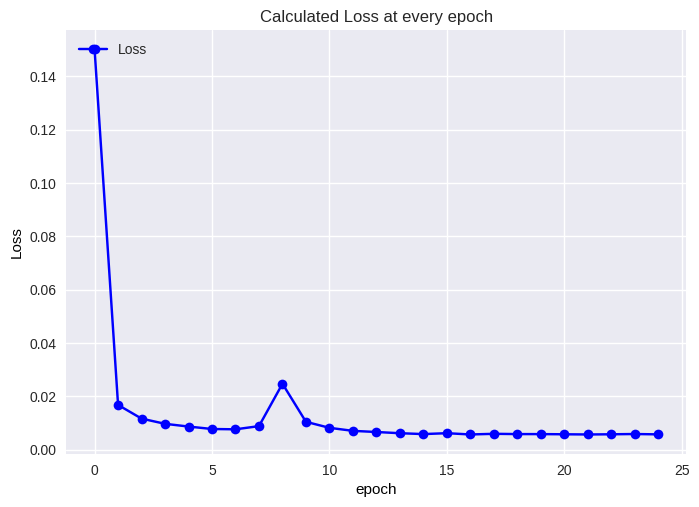

In [95]:
# Plotting Loss over Training.

def PlotLossGraph(X):
  print("Demonstrating the plotting of Loss vs Iteration")

  # Generate x-axis values
  axisx = range(len(X.keys()))

  # Generate y-axis values
  axisy = [0] * (len(X.keys()))

  # Plot the loss values
  plt.plot(X.keys(),X.values(), label='Loss',color='blue',marker='o')
  plt.title('Calculated Loss at every epoch')
  plt.xlabel('epoch', color='#000000')
  plt.ylabel('Loss', color='#000000')
  plt.legend(loc='upper left')
  plt.grid(True)
  plt.show()

PlotLossGraph(TRAIN_LOSS_HIST)

In [96]:

# Calculating the accuracy of the model
# Define the tolerance for correct prediction in a regression problem
torch.manual_seed(8999)
TotalTestPoint = 0
CorrectPred = 0

# Iterate through the test dataset
for X_, Y_ in zip(X_test,y_test):
  X_, Y_ = X_.to(device), Y_.to(device)
  HID, OUT =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device), 0

  # Forward pass through the model
  for i in range(X_.shape[0]):
    OUT, HID = Elmon_RNN_Model(X_[i,:], HID)

  # Check if the prediction is within the tolerance for correctness
  if abs(OUT.item()-Y_.item()) <0.02:
    CorrectPred+=1
  TotalTestPoint+=1

# Calculate and print the accuracy
ElmonRNN_Model_Accuracy =(CorrectPred/TotalTestPoint) * 100
print("ElmonRNN_Model_Accuracy : %2.4f"%ElmonRNN_Model_Accuracy )

ElmonRNN_Model_Accuracy : 28.7273


# **Implementation of LSTM**

In [97]:
# Implementation of LSTM
# Follows the equations and figure to implement

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        # Input, forget, output, and cell state update gates
        self.Ui = nn.Linear(input_size, hidden_size  , bias=False )
        self.Wi = nn.Linear(hidden_size, hidden_size)

        self.Uo = nn.Linear(input_size, hidden_size  , bias=False )
        self.Wo = nn.Linear(hidden_size, hidden_size)

        self.Uf = nn.Linear(input_size, hidden_size  , bias=False )
        self.Wf = nn.Linear(hidden_size, hidden_size)

        self.Uc = nn.Linear(input_size, hidden_size)
        self.Wc = nn.Linear(hidden_size, hidden_size)

        # Output layer
        self.V = nn.Linear(hidden_size, output_size)

        self.double()

    def forward(self, INP, HID_State, CELL_State):

        # Forget gate
        INPuf = self.Uf(INP)
        INPwf = self.Wf(HID_State)
        Ft = torch.sigmoid(INPuf + INPwf)

        # Input gate
        INPui = self.Ui(INP)
        INPwi = self.Wi(HID_State)
        It = torch.sigmoid(INPui + INPwi)

        # Output gate
        INPuo = self.Uo(INP)
        INPwo = self.Wo(HID_State)
        Ot = torch.sigmoid(INPuo + INPwo)

        # Cell state update
        INPuc = self.Uc(INP)
        CTt = torch.sigmoid(INPuc)

        Ct = (Ft * CELL_State) + ( It * CTt)

        # Hidden state update
        Ht = Ot * torch.sigmoid(Ct)

        # Output prediction
        OUT = self.V(Ht)
        return OUT, Ht, Ct

In [98]:
torch.manual_seed(8999)
# Initializing perameters
MAX_EPOCH = 25
input_size  = 2
hidden_size  = 8
output_size  = 1
learning = 0.006
Model2 = LSTM(input_size, hidden_size, output_size).to(device)

print(Model2)

LSTM(
  (Ui): Linear(in_features=2, out_features=8, bias=False)
  (Wi): Linear(in_features=8, out_features=8, bias=True)
  (Uo): Linear(in_features=2, out_features=8, bias=False)
  (Wo): Linear(in_features=8, out_features=8, bias=True)
  (Uf): Linear(in_features=2, out_features=8, bias=False)
  (Wf): Linear(in_features=8, out_features=8, bias=True)
  (Uc): Linear(in_features=2, out_features=8, bias=True)
  (Wc): Linear(in_features=8, out_features=8, bias=True)
  (V): Linear(in_features=8, out_features=1, bias=True)
)


In [99]:
# Some Empty dictionary to save data to plot later
TRAIN_LOSS_HIST_LSTM = {}

# Defined a loss function as MSE
MSE_LOSS = nn.MSELoss()

# Defined OPTIMIZER as Adam
OPTIMIZER = torch.optim.Adam(Model2.parameters(), lr = learning)

# Run for a specified number of epochs
for epoch in tqdm(range(MAX_EPOCH)):

  # Empty list to store losses for this epoch
  EPOCH_LOSS_HIST_LSTM = list()

  # Iterate over the training dataset
  for X_, Y_ in zip(X_train,y_train):

    # Setting gradients to zero
    Model2.zero_grad()

    # Intializing Loss
    loss = 0

    # Intializing perameter to pass in forwardpass
    HID =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device)
    CELL =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device)
    X_, Y_ = X_.to(device), Y_.to(device)

    for i in range(X_.shape[0]):
      OUT, HID, CELL = Model2(X_[i,:], HID,CELL)

    # finding loss on last output.
    loss = MSE_LOSS(OUT, Y_)

    # Calling Backward on final loss
    loss.backward()

    # Cliping the gradient to prevent exploding gradients
    nn.utils.clip_grad_norm_(Model2.parameters(), 3)

    # Updating model perameters
    OPTIMIZER.step()

    # Saving currunt loss
    EPOCH_LOSS_HIST_LSTM.append(loss.detach().item())

  # Saving avg loss over whole dataset
  TRAIN_LOSS_HIST_LSTM[epoch] = torch.tensor(EPOCH_LOSS_HIST_LSTM).mean()

  # Print loss for each epoch
  print(f"Epoch {epoch+1}, Loss: {TRAIN_LOSS_HIST_LSTM[epoch]}")

  4%|▍         | 1/25 [00:18<07:35, 18.97s/it]

Epoch 1, Loss: 0.14983026683330536


  8%|▊         | 2/25 [00:37<07:12, 18.82s/it]

Epoch 2, Loss: 0.008201230317354202


 12%|█▏        | 3/25 [00:55<06:47, 18.51s/it]

Epoch 3, Loss: 0.002631907118484378


 16%|█▌        | 4/25 [01:14<06:30, 18.59s/it]

Epoch 4, Loss: 0.0016633115010336041


 20%|██        | 5/25 [01:33<06:13, 18.66s/it]

Epoch 5, Loss: 0.001203835941851139


 24%|██▍       | 6/25 [01:51<05:51, 18.52s/it]

Epoch 6, Loss: 0.0009485920891165733


 28%|██▊       | 7/25 [02:10<05:33, 18.54s/it]

Epoch 7, Loss: 0.0008046960574574769


 32%|███▏      | 8/25 [02:28<05:16, 18.63s/it]

Epoch 8, Loss: 0.0007122949464246631


 36%|███▌      | 9/25 [02:47<04:56, 18.52s/it]

Epoch 9, Loss: 0.0006456843693740666


 40%|████      | 10/25 [03:06<04:39, 18.65s/it]

Epoch 10, Loss: 0.0005913454806432128


 44%|████▍     | 11/25 [03:25<04:22, 18.72s/it]

Epoch 11, Loss: 0.0005423317779786885


 48%|████▊     | 12/25 [03:43<04:02, 18.66s/it]

Epoch 12, Loss: 0.0004965332918800414


 52%|█████▏    | 13/25 [04:03<03:47, 18.94s/it]

Epoch 13, Loss: 0.0004538118082564324


 56%|█████▌    | 14/25 [04:22<03:28, 18.97s/it]

Epoch 14, Loss: 0.0004144398553762585


 60%|██████    | 15/25 [04:40<03:08, 18.81s/it]

Epoch 15, Loss: 0.00037882570177316666


 64%|██████▍   | 16/25 [04:59<02:48, 18.72s/it]

Epoch 16, Loss: 0.0003472611715551466


 68%|██████▊   | 17/25 [05:16<02:27, 18.45s/it]

Epoch 17, Loss: 0.0003196229226887226


 72%|███████▏  | 18/25 [05:35<02:09, 18.46s/it]

Epoch 18, Loss: 0.000295423436909914


 76%|███████▌  | 19/25 [05:54<01:51, 18.66s/it]

Epoch 19, Loss: 0.0002740371855907142


 80%|████████  | 20/25 [06:12<01:32, 18.42s/it]

Epoch 20, Loss: 0.00025480356998741627


 84%|████████▍ | 21/25 [06:30<01:13, 18.43s/it]

Epoch 21, Loss: 0.0002371254813624546


 88%|████████▊ | 22/25 [06:48<00:54, 18.24s/it]

Epoch 22, Loss: 0.00022061883646529168


 92%|█████████▏| 23/25 [07:07<00:36, 18.33s/it]

Epoch 23, Loss: 0.0002051808260148391


 96%|█████████▌| 24/25 [07:25<00:18, 18.29s/it]

Epoch 24, Loss: 0.00019092550792265683


100%|██████████| 25/25 [07:43<00:00, 18.52s/it]

Epoch 25, Loss: 0.00017804249364417046


Demonstrating the plotting of Loss vs Iteration


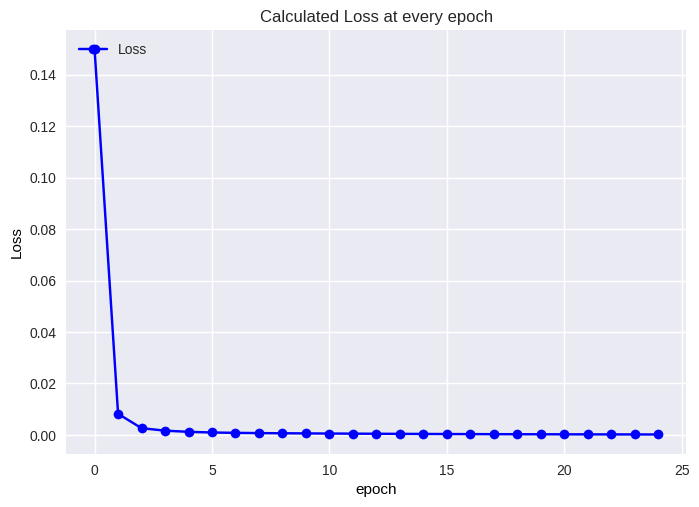

In [100]:

PlotLossGraph(TRAIN_LOSS_HIST_LSTM)

In [101]:
# Here I have just checked Accuracy of the model
# Since this is regression problem i have taken +-0.02 as perameter to determine correct prediction
# Initialize variables to track total test points and correctly predicted points
TotalTestPoint = 0
CorrectPred = 0

# Iterate over the test dataset
for X_, Y_ in zip(X_test,y_test):
  X_, Y_ = X_.to(device), Y_.to(device)

  # Initialize hidden and cell state for LSTM
  HID, OUT =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device), 0
  CELL =  torch.zeros(1, hidden_size, requires_grad=False,dtype=torch.float64).to(device)

  # Forward pass through the model
  for i in range(X_.shape[0]):
    OUT, HID, CELL = Model2(X_[i,:], HID,CELL)

  # Check if the absolute difference between predicted and actual value is less than 0.02
  if abs(OUT.item()-Y_.item()) <0.02:
    CorrectPred+=1

  TotalTestPoint+=1

# Calculate and print the accuracy
LSTM_ACC = (CorrectPred/TotalTestPoint)*100
print("Accuracy :  %2.4f"%LSTM_ACC )

Accuracy :  92.2424


# **Implementation of GRU**

In [102]:
# This is implementation of GRU
# I have followed above equations & figure to implement.
class GRU(nn.Module):
    def __init__(self, INP_S, HID_S, OUT_S):
        super().__init__()

        # Define linear layers for update gate (z)
        self.Uz = nn.Linear(INP_S, HID_S  , bias=False )
        self.Wz = nn.Linear(HID_S, HID_S)

        # Define linear layers for reset gate (r)
        self.Ur = nn.Linear(INP_S, HID_S  , bias=False )
        self.Wr = nn.Linear(HID_S, HID_S)

        # Define linear layers for candidate hidden state (h_hat)
        self.Uh = nn.Linear(INP_S, HID_S  , bias=False)
        self.Wh = nn.Linear(HID_S, HID_S , bias=False )

        # Define linear layer for output
        self.V = nn.Linear(HID_S, OUT_S)

        # Set the data type to double
        self.double()

    def forward(self, INP, HID_State):

        # Compute update gate (z)
        INPuz = self.Uz(INP)
        HIDwz = self.Wz(HID_State)
        Zt = torch.sigmoid(INPuz + HIDwz)

        # Compute reset gate (r)
        INPur = self.Ur(INP)
        HIDwr = self.Wr(HID_State)
        Rt = torch.sigmoid(INPur + HIDwr)

        # Compute candidate hidden state (h_hat)
        INPuh = self.Uh(INP)
        HIDwh = self.Wh(Rt * HID_State)
        Ht_hat = torch.tanh(INPuh + HIDwh)

        # Compute new hidden state (h)
        Ht = ((1 - Zt) * HID_State) + (Zt * Ht_hat)

        # Compute output
        OUT = self.V(Ht)
        return OUT, Ht

In [103]:

torch.manual_seed(8999)
# Initializing perameters
MAX_EPOCH = 25
INP_S = 2
HID_S = 8
OUT_S = 1
L     = 0.006
Model3 = GRU(INP_S, HID_S, OUT_S).to(device)

print(Model3)

GRU(
  (Uz): Linear(in_features=2, out_features=8, bias=False)
  (Wz): Linear(in_features=8, out_features=8, bias=True)
  (Ur): Linear(in_features=2, out_features=8, bias=False)
  (Wr): Linear(in_features=8, out_features=8, bias=True)
  (Uh): Linear(in_features=2, out_features=8, bias=False)
  (Wh): Linear(in_features=8, out_features=8, bias=False)
  (V): Linear(in_features=8, out_features=1, bias=True)
)


In [104]:
# Some Empty dictionary to save data to plot later
TRAIN_LOSS_HIST_GRU = {}

# Defined a loss function as MSE
MSE_LOSS = nn.MSELoss()

# Defined OPTIMIZER as Adam
OPTIMIZER = torch.optim.Adam(Model3.parameters(), lr = L)

# Run till MaxEpoch8
for epoch in tqdm(range(MAX_EPOCH)):
  # Empty Temp dicts
  EPOCH_LOSS_HIST_GRU = list()

  # Iter over data set [SGD]
  for X_, Y_ in zip(X_train,y_train):

    # Setting gradients to zero
    Model3.zero_grad()

    # Intializing Loss
    loss = 0

    # Intializing perameter to pass in forwardpass
    HID =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device)
    X_, Y_ = X_.to(device), Y_.to(device)

    for i in range(X_.shape[0]):
      OUT, HID = Model3(X_[i,:], HID)

    # finding loss on last output.
    loss  = MSE_LOSS(OUT, Y_)

    # Calling Backward on final loss
    loss.backward()

    # Cliping the gradient to prevent exploding gradients
    nn.utils.clip_grad_norm_(Model3.parameters(), 3)

    # Updating model perameters
    OPTIMIZER.step()

    # Saving currunt loss
    EPOCH_LOSS_HIST_GRU.append(loss.detach().item())

  # Saving avg loss over whole dataset
  TRAIN_LOSS_HIST_GRU[epoch] = torch.tensor(EPOCH_LOSS_HIST_GRU).mean()

  # Print loss for each epoch
  print(f"Epoch {epoch+1}, Loss: {TRAIN_LOSS_HIST_GRU[epoch]}")

  4%|▍         | 1/25 [00:16<06:24, 16.02s/it]

Epoch 1, Loss: 0.02178744226694107


  8%|▊         | 2/25 [00:31<06:06, 15.94s/it]

Epoch 2, Loss: 0.001002237549982965


 12%|█▏        | 3/25 [00:48<05:58, 16.29s/it]

Epoch 3, Loss: 0.0008064587600529194


 16%|█▌        | 4/25 [01:04<05:41, 16.24s/it]

Epoch 4, Loss: 0.0006112052942626178


 20%|██        | 5/25 [01:21<05:25, 16.28s/it]

Epoch 5, Loss: 0.00047377048758789897


 24%|██▍       | 6/25 [01:37<05:09, 16.28s/it]

Epoch 6, Loss: 0.00038907534326426685


 28%|██▊       | 7/25 [01:53<04:54, 16.38s/it]

Epoch 7, Loss: 0.0003244996478315443


 32%|███▏      | 8/25 [02:10<04:36, 16.29s/it]

Epoch 8, Loss: 0.00027547116042114794


 36%|███▌      | 9/25 [02:26<04:19, 16.24s/it]

Epoch 9, Loss: 0.0002460571122355759


 40%|████      | 10/25 [02:42<04:05, 16.37s/it]

Epoch 10, Loss: 0.00021728093270212412


 44%|████▍     | 11/25 [02:58<03:47, 16.27s/it]

Epoch 11, Loss: 0.00019000789325218648


 48%|████▊     | 12/25 [03:15<03:33, 16.39s/it]

Epoch 12, Loss: 0.0001688030461082235


 52%|█████▏    | 13/25 [03:31<03:14, 16.23s/it]

Epoch 13, Loss: 0.00015408445324283093


 56%|█████▌    | 14/25 [03:48<03:01, 16.49s/it]

Epoch 14, Loss: 0.00014263755292631686


 60%|██████    | 15/25 [04:04<02:43, 16.39s/it]

Epoch 15, Loss: 0.00013441660848911852


 64%|██████▍   | 16/25 [04:21<02:27, 16.39s/it]

Epoch 16, Loss: 0.00012663411325775087


 68%|██████▊   | 17/25 [04:37<02:11, 16.44s/it]

Epoch 17, Loss: 0.00011883440311066806


 72%|███████▏  | 18/25 [04:54<01:55, 16.45s/it]

Epoch 18, Loss: 0.00010948270937660709


 76%|███████▌  | 19/25 [05:10<01:39, 16.51s/it]

Epoch 19, Loss: 9.818116086535156e-05


 80%|████████  | 20/25 [05:26<01:21, 16.34s/it]

Epoch 20, Loss: 9.00061204447411e-05


 84%|████████▍ | 21/25 [05:43<01:05, 16.36s/it]

Epoch 21, Loss: 8.675814751768485e-05


 88%|████████▊ | 22/25 [05:59<00:48, 16.26s/it]

Epoch 22, Loss: 8.520183473592624e-05


 92%|█████████▏| 23/25 [06:15<00:32, 16.43s/it]

Epoch 23, Loss: 8.323619840666652e-05


 96%|█████████▌| 24/25 [06:32<00:16, 16.36s/it]

Epoch 24, Loss: 8.132754737744108e-05


100%|██████████| 25/25 [06:48<00:00, 16.34s/it]

Epoch 25, Loss: 7.951286534080282e-05


Demonstrating the plotting of Loss vs Iteration


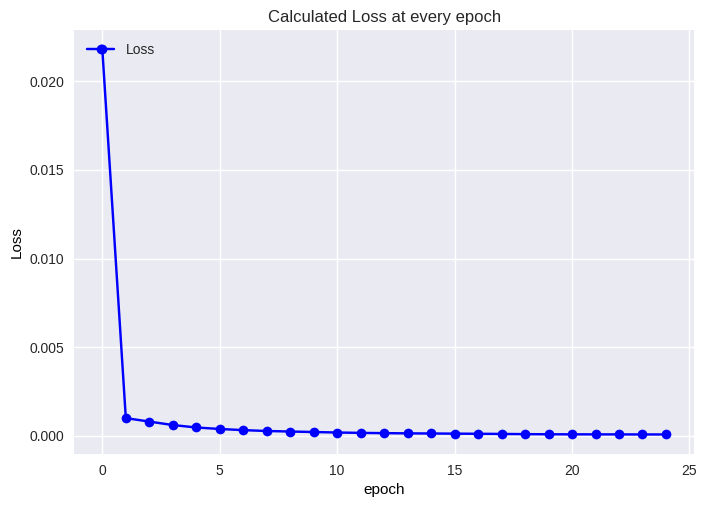

In [105]:
PlotLossGraph(TRAIN_LOSS_HIST_GRU)

In [106]:

# Here I have just checked Accuracy of the model
# Since this is regression problem i have taken +-0.02 as perameter to determine correct prediction
TotalTestPoint = 0
CorrectPred = 0
for X_, Y_ in zip(X_test,y_test):
  X_, Y_ = X_.to(device), Y_.to(device)
  HID, OUT =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device), 0
  for i in range(X_.shape[0]):
    OUT, HID = Model3(X_[i,:], HID)
  if abs(OUT.item()-Y_.item()) <0.02:
    CorrectPred+=1
  TotalTestPoint+=1
GRU_ACC = (CorrectPred/TotalTestPoint)*100
print("Accuracy :  %2.4f"%GRU_ACC )

Accuracy :  99.7576


# **Calculating Baseline**

In [107]:
# Calculating Baseline
TRAIN_LOSS_HIST_BASELINE = {}
for epoch in tqdm(range(MAX_EPOCH)):
  EPOCH_LOSS_HIST_BASELINE = list()
  for X_, Y_ in zip(X_train,y_train):
    lossB = MSE_LOSS(torch.tensor(1).to(device), Y_)
    EPOCH_LOSS_HIST_BASELINE.append(lossB.detach().item())
  TRAIN_LOSS_HIST_BASELINE[epoch] = torch.tensor(EPOCH_LOSS_HIST_BASELINE).mean()

100%|██████████| 25/25 [00:04<00:00,  5.63it/s]


# **Comparisons**

This is a Combined Plotting of all models for the Loss vs Iteration


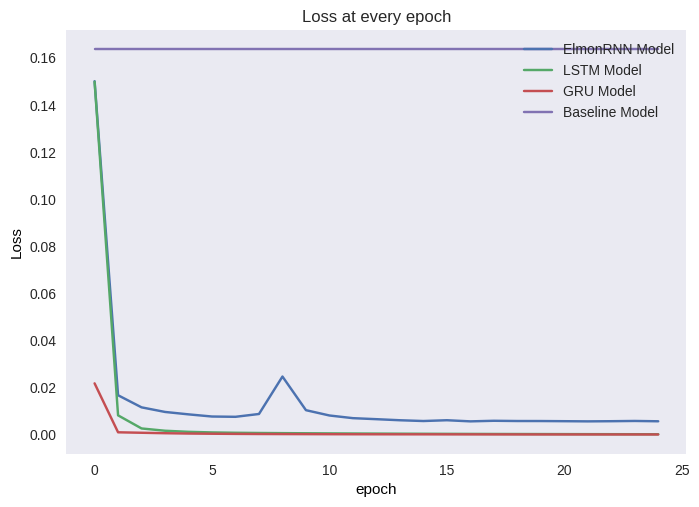

In [108]:
  # Combined Plotting of all models for Loss vs Iteration
  print("This is a Combined Plotting of all models for the Loss vs Iteration")

  # Define x-axis values for all models
  axisx = range(len(TRAIN_LOSS_HIST_LSTM.keys()))

  # Define y-axis values for all models
  axisy = [0] * (len(TRAIN_LOSS_HIST_LSTM.keys()))

  # Plotting the loss for each model
  plt.plot(TRAIN_LOSS_HIST.keys(),TRAIN_LOSS_HIST.values(),  label='ElmonRNN Model')
  plt.plot(TRAIN_LOSS_HIST_LSTM.keys(),TRAIN_LOSS_HIST_LSTM.values(), label='LSTM Model')
  plt.plot(TRAIN_LOSS_HIST_GRU.keys(),TRAIN_LOSS_HIST_GRU.values(), label='GRU Model ')
  plt.plot(TRAIN_LOSS_HIST_BASELINE.keys(),TRAIN_LOSS_HIST_BASELINE.values(), label='Baseline Model')

  plt.title('Loss at every epoch')
  plt.xlabel('epoch', color='#000000')
  plt.ylabel('Loss', color='#000000')

  plt.legend(loc='upper right')

  plt.grid()

  plt.show()


In [109]:

print("Model Accuracy of ElMon_RNN , LSTM , GRU ")
print("-"*29)
print("| ElmonRNN_ACC".ljust(15), ("|  %2.2f "%(ElmonRNN_Model_Accuracy)+"%  |").rjust(7,'0'))
print("| LSTM_ACC".ljust(15),     ("|  %2.2f "%(LSTM_ACC)+"%  |").rjust(7,'0'))
print("| GRU_ACC".ljust(15),      ("|  %2.2f "%(GRU_ACC)+"%  |").rjust(7,'0'))
print("-"*29)

Model Accuracy of ElMon_RNN , LSTM , GRU 
-----------------------------
| ElmonRNN_ACC  |  28.73 %  |
| LSTM_ACC      |  92.24 %  |
| GRU_ACC       |  99.76 %  |
-----------------------------


In [110]:
np.random.seed(8999)
torch.manual_seed(8999)

Test_Sample_Sizes = [15,20,25,30]
print("_"*100)
for S in Test_Sample_Sizes:
  D1 = np.random.random(S).astype(np.double)
  D2 = np.zeros(S)
  # Randomly seet 2 positions as one.
  ONEs = np.random.randint(S,size=(2))
  while ONEs[0] == ONEs[1]:
    ONEs = np.random.randint(S,size=(2))
  D2[ONEs] = 1

  # Append to Data array after coverting to tensor.
  X_Test = torch.from_numpy(np.array([(D1[i] , D2[i]) for i in range(S)])).double()
  Y_Test = torch.from_numpy(np.array([ D1[ONEs[0]] + D1[ONEs[1]] ]))

  print("For Input Length :",S)
  print("_"*50)
  print("ElmonRNN :".ljust(15) , end = '')
  HID, OUT =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device), 0
  for i in range(X_Test.shape[0]):
    OUT, HID = Elmon_RNN_Model(X_Test[i,:], HID)
  print("| Y : %1.4f "%Y_Test.item()," | Pred : %1.4f  |"%OUT.item())

  print("LSTM :".ljust(15) , end = '')
  HID, OUT =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device), 0
  CELL =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device)
  for i in range(X_Test.shape[0]):
    OUT, HID, CELL = Model2(X_Test[i,:], HID,CELL)
  print("| Y : %1.4f "%Y_Test.item()," | Pred : %1.4f  |"%OUT.item())

  print("GRU :".ljust(15) , end = '')
  HID, OUT =  torch.zeros(1, HID_S, requires_grad=False,dtype=torch.float64).to(device), 0
  for i in range(X_Test.shape[0]):
    OUT, HID = Model3(X_Test[i,:], HID)
  print("| Y : %1.4f "%Y_Test.item()," | Pred : %1.4f  |"%OUT.item())

  print("_"*100)

____________________________________________________________________________________________________
For Input Length : 15
__________________________________________________
ElmonRNN :     | Y : 1.8296   | Pred : 0.0034  |
LSTM :         | Y : 1.8296   | Pred : 2.0117  |
GRU :          | Y : 1.8296   | Pred : 1.8386  |
____________________________________________________________________________________________________
For Input Length : 20
__________________________________________________
ElmonRNN :     | Y : 1.6875   | Pred : 0.6332  |
LSTM :         | Y : 1.6875   | Pred : 1.7335  |
GRU :          | Y : 1.6875   | Pred : 1.6116  |
____________________________________________________________________________________________________
For Input Length : 25
__________________________________________________
ElmonRNN :     | Y : 1.2127   | Pred : 1.5931  |
LSTM :         | Y : 1.2127   | Pred : 1.2476  |
GRU :          | Y : 1.2127   | Pred : 1.2790  |
_____________________________________